# Country Analysis Cyberattacks #

In [29]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font
plt.rcParams['font.family'] = 'Times New Roman'

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Working directory
import os

In [30]:
# Load data
df = pd.read_csv('cyberattacks_data.csv')
df.head()

,ID,name,description,start_date,end_date,inclusion_criteria,inclusion_criteria_subcode,source_incident_detection_disclosure,incident_type,receiver_name,...,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,casualties,sources_url
0,11,Titan Rain,Titan Rain was the designation given by the fe...,2003-01-01,2007-01-01,Attack conducted by non-state group / non-stat...,Attack conducted by a state-affiliated group (...,Incident disclosed by media (without further i...,Data theft,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['http://content.time.com/time/subscriber/arti...
1,16,Athens Affair,Vodafone Greeces services were hacked by an gr...,2004-07-01,2005-01-01,Attack conducted by nation state (generic “sta...,NaN,Incident disclosed by media (without further i...,Data theft; Hijacking with Misuse,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['https://spectrum.ieee.org/telecom/security/t...
2,19,PoseidonGroup: The Boutique,"Kaspersky identified Poseidon; a Brazilian, Po...",2005-01-01,2016-01-01,"Attack on (inter alia) political target(s), no...",NaN,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['https://securelist.com/poseidon-group-a-targ...
3,25,Operation Shady RAT,Operation Shady RAT is the name given to hacke...,2006-01-01,2011-01-01,Attack conducted by nation state (generic “sta...,NaN,Incident disclosed by IT-security company,Data theft,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['https://web.archive.org/web/20110804083836/h...
4,34,APT 1 Campaign 2006-2013,"In its seminal report about APT 1, IT-company...",2006-01-01,2013-01-01,Attack conducted by nation state (generic “sta...,NaN,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['https://www.fireeye.com/content/dam/fireeye-...


In [31]:
import ast

# Convert string representations of lists to actual lists
df['receiver_country'] = df['receiver_country'].apply(ast.literal_eval)

# Ensure case consistency and remove leading/trailing whitespaces
my_country = ['Estonia', 'Germany', 'France', 'Netherlands']
my_country = [country.strip() for country in my_country]

# Create a new DataFrame with only rows containing countries from my_country
filtered_df = df[df['receiver_country'].apply(lambda x: any(country in my_country for country in x))]

# Resetting the index of the new DataFrame
filtered_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print(filtered_df)


       ID                                               name  \
0      19                        PoseidonGroup: The Boutique   
1      25                                Operation Shady RAT   
2      30                  BND vs. Spiegel & Afghan Minister   
3      26                   APT 10/Technology Theft Campaign   
4      43                                Careto aka The Mask   
..    ...                                                ...   
101  1902  Unknown actors temporarily disrupted access to...   
102  2041  Qilin ransomware group targeted elderly care f...   
103  2043  Website of German defence company Rheinmetall ...   
104  2076  Unknown actors compromised networks across var...   
105  2100  Pro-Russian hacker group NoName057(16) disrupt...   

                                           description  start_date  \
0    Kaspersky identified Poseidon; a Brazilian, Po...  2005-01-01   
1    Operation Shady RAT is the name given to hacke...  2006-01-01   
2    The German BND s

In [32]:
# Function to filter the list based on my_country
def filter_countries(country_list):
    return [country for country in country_list if country in my_country]

# Apply the function to each element in 'receiver_country' column
filtered_df['receiver_country'] = filtered_df['receiver_country'].apply(filter_countries)

# Display the modified DataFrame
print(filtered_df[['receiver_country']])

      receiver_country
0             [France]
1            [Germany]
2            [Germany]
3    [France, Germany]
4             [France]
..                 ...
101          [Estonia]
102      [Netherlands]
103          [Germany]
104  [France, Germany]
105           [France]

[106 rows x 1 columns]


C:\Users\ester\AppData\Local\Temp\ipykernel_18516\2585509332.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['receiver_country'] = filtered_df['receiver_country'].apply(filter_countries)


In [33]:
# Display the updated value counts for the modified 'receiver_country' column
print(filtered_df['receiver_country'].explode().value_counts())


receiver_country
Germany        67
France         44
Netherlands    17
Estonia         3
Name: count, dtype: int64


In [34]:
import pandas as pd

# Assuming 'filtered_df' is your DataFrame
# If your DataFrame has a different name, replace 'filtered_df' with your actual DataFrame name

# Convert 'start_date' column to datetime type
filtered_df['start_date'] = pd.to_datetime(filtered_df['start_date'])

# Explode the 'receiver_country' column to create separate rows for each country
exploded_df = filtered_df.explode('receiver_country')

# Group by 'start_date' and 'receiver_country', and count the number of occurrences
grouped_df = exploded_df.groupby([exploded_df['start_date'].dt.year, 'receiver_country']).size().reset_index(name='attack_count')

# Print the grouped DataFrame
print(grouped_df)


    start_date receiver_country  attack_count
0       2005.0           France             1
1       2006.0           France             1
2       2006.0          Germany             3
3       2007.0          Estonia             1
4       2007.0           France             4
5       2007.0          Germany             1
6       2008.0           France             2
7       2008.0          Germany             1
8       2009.0           France             1
9       2009.0          Germany             2
10      2009.0      Netherlands             2
11      2010.0           France             2
12      2010.0          Germany             2
13      2010.0      Netherlands             1
14      2011.0           France             5
15      2011.0          Germany             3
16      2011.0      Netherlands             1
17      2012.0           France             1
18      2012.0          Germany             4
19      2013.0          Estonia             1
20      2013.0          Germany   

C:\Users\ester\AppData\Local\Temp\ipykernel_18516\1745532778.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['start_date'] = pd.to_datetime(filtered_df['start_date'])


In [35]:
# Convert 'start_date' column to datetime type
grouped_df['start_date'] = pd.to_datetime(grouped_df['start_date'], format='%Y')

# Group by 'start_date' and 'receiver_country', and count the number of occurrences
grouped_df = exploded_df.groupby([exploded_df['start_date'].dt.year, 'receiver_country']).size().reset_index(name='attack_count')

# Pivot the DataFrame for a structured format
pivot_df = grouped_df.pivot(index='start_date', columns='receiver_country', values='attack_count').fillna(0)

# Convert the pivot DataFrame to LaTeX format
latex_table = pivot_df.to_latex()

# Format numbers with up to 2 decimal places in the DataFrame
pivot_df_formatted = pivot_df.applymap(lambda x: f'{x:.0f}' if x.is_integer() else f'{x:.2f}')

# Convert the DataFrame to LaTeX format
latex_table = pivot_df_formatted.to_latex()

# Print or save the LaTeX table
print(latex_table)

\begin{tabular}{lllll}
\toprule
receiver_country & Estonia & France & Germany & Netherlands \\
start_date &  &  &  &  \\
\midrule
2005.000000 & 0 & 1 & 0 & 0 \\
2006.000000 & 0 & 1 & 3 & 0 \\
2007.000000 & 1 & 4 & 1 & 0 \\
2008.000000 & 0 & 2 & 1 & 0 \\
2009.000000 & 0 & 1 & 2 & 2 \\
2010.000000 & 0 & 2 & 2 & 1 \\
2011.000000 & 0 & 5 & 3 & 1 \\
2012.000000 & 0 & 1 & 4 & 0 \\
2013.000000 & 1 & 0 & 3 & 0 \\
2014.000000 & 0 & 5 & 6 & 1 \\
2015.000000 & 0 & 4 & 2 & 1 \\
2016.000000 & 0 & 3 & 3 & 2 \\
2017.000000 & 0 & 2 & 7 & 3 \\
2018.000000 & 0 & 1 & 4 & 1 \\
2019.000000 & 0 & 2 & 1 & 1 \\
2020.000000 & 0 & 0 & 1 & 1 \\
2021.000000 & 0 & 2 & 4 & 1 \\
2022.000000 & 0 & 5 & 13 & 1 \\
2023.000000 & 1 & 1 & 7 & 1 \\
\bottomrule
\end{tabular}



C:\Users\ester\AppData\Local\Temp\ipykernel_18516\2571374095.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_df_formatted = pivot_df.applymap(lambda x: f'{x:.0f}' if x.is_integer() else f'{x:.2f}')


In [36]:
# Group by 'receiver_country' and 'start_date', and calculate the weighted average of 'weighted_cyber_intensity'
weighted_avg_df = exploded_df.groupby(['receiver_country', 'start_date'])['weighted_cyber_intensity'].mean().reset_index()

# Print or display the resulting DataFrame
print(weighted_avg_df)

    receiver_country start_date  weighted_cyber_intensity
0            Estonia 2007-04-27                       2.0
1            Estonia 2013-11-01                       1.0
2            Estonia 2023-01-19                       1.0
3             France 2005-01-01                       4.0
4             France 2006-01-01                       2.0
..               ...        ...                       ...
97       Netherlands 2019-01-01                       4.0
98       Netherlands 2020-09-01                       4.0
99       Netherlands 2021-10-01                       2.0
100      Netherlands 2022-02-17                       6.0
101      Netherlands 2023-01-28                       1.0

[102 rows x 3 columns]


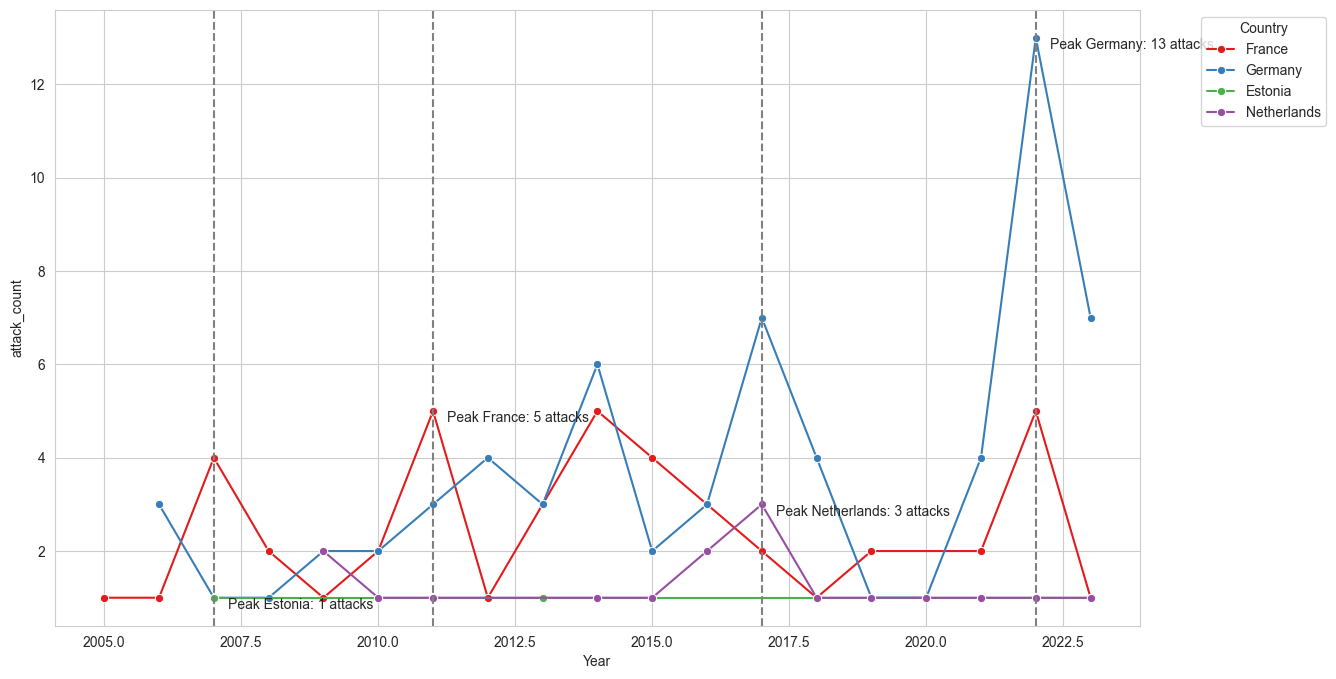

In [49]:
# Assuming 'start_date' is already in datetime format
exploded_df['start_year'] = exploded_df['start_date'].dt.year

# Group by 'start_year' and 'receiver_country', count the number of cyber attacks
temporal_df = exploded_df.groupby(['start_year', 'receiver_country']).size().reset_index(name='attack_count')

# Plotting
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.lineplot(data=temporal_df, x='start_year', y='attack_count', hue='receiver_country', marker='o', palette='Set1')
plt.xlabel('Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate peaks
for country in temporal_df['receiver_country'].unique():
    peak_year = temporal_df.loc[temporal_df[temporal_df['receiver_country'] == country]['attack_count'].idxmax(), 'start_year']
    peak_count = temporal_df[temporal_df['receiver_country'] == country]['attack_count'].max()
    plt.annotate(f'Peak {country}: {peak_count} attacks', xy=(peak_year, peak_count),
                 xytext=(10, -10), textcoords='offset points', ha='left', va='bottom')
    
    # Add vertical line at the peak
    plt.axvline(x=peak_year, color='gray', linestyle='--')

# Times New Roman font
plt.rcParams['font.family'] = 'Times New Roman'

# Save the plot
# plt.savefig('path/images/attacks_country.png', dpi=300, bbox_inches='tight')

In [ ]:
# Export the DataFrame to XLSX format
exploded_df.to_excel('exploded_df.xlsx', index=False)

In [ ]:
exploded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 105
Data columns (total 82 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   ID                                              131 non-null    int64         
 1   name                                            131 non-null    object        
 2   description                                     131 non-null    object        
 3   start_date                                      129 non-null    datetime64[ns]
 4   end_date                                        126 non-null    object        
 5   inclusion_criteria                              131 non-null    object        
 6   inclusion_criteria_subcode                      37 non-null     object        
 7   source_incident_detection_disclosure            130 non-null    object        
 8   incident_type                                   131 non

In [ ]:
# Replace semicolons with commas and split on commas
exploded_df['attributed_initiator_country'] = exploded_df['attributed_initiator_country'].str.replace(';', ',').str.split(',')

# Remove leading and trailing spaces from each country name
exploded_df['attributed_initiator_country'] = exploded_df['attributed_initiator_country'].apply(lambda x: [country.strip() for country in x] if isinstance(x, list) else x)

# Check the unique values
unique_values = exploded_df['attributed_initiator_country'].explode().value_counts()

# Print the unique values
print(unique_values)


attributed_initiator_country
China                              58
Russia                             53
Unknown                            42
Islamic Republic of                13
Iran                               13
United Kingdom                      8
Lebanon                             8
United States                       7
None                                7
Korea                               6
Democratic People's Republic of     6
Germany                             6
France                              4
Not available                       3
Turkey                              2
Vietnam                             2
Syria                               2
Ukraine                             2
Brazil                              1
Belarus                             1
Algeria                             1
Ethiopia                            1
Netherlands                         1
Name: count, dtype: int64


In [ ]:
# Create a df_attribution DataFrame with the 'attributed_initiator_country', ID, receiver_country, and start_date columns
df_attribution = exploded_df[['ID', 'receiver_country', 'start_date', 'attributed_initiator_country', 'has_disruption']]
df_attribution.head()

,ID,receiver_country,start_date,attributed_initiator_country,has_disruption
0,19,France,2005-01-01,[Brazil],False
1,25,Germany,2006-01-01,"[China, China, China, China, China, China, Chi...",False
2,30,Germany,2006-06-08,[Germany],False
3,26,France,2006-01-01,"[China, China]",False
3,26,Germany,2006-01-01,"[China, China]",False


In [ ]:
import re

# Function to clean up the values in the attributed_initiator_country column
def clean_countries(x):
    try:
        # Use regular expression to find all country names
        country_list = re.findall(r"'(.*?)'", str(x))
        
        # Check if the country_list is not empty
        if country_list:
            # Strip leading and trailing spaces from each country, join them with ';', and sort
            return ';'.join(sorted(set([country.strip() for country in country_list])))
        
    except Exception:
        pass  # Ignore errors and return the original value

    # If the value couldn't be processed, return it as is
    return str(x)

# Apply the clean_countries function to the attributed_initiator_country column
df_attribution['attributed_initiator_country'] = df_attribution['attributed_initiator_country'].apply(clean_countries)


C:\Users\ester\AppData\Local\Temp\ipykernel_18516\3183902644.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attribution['attributed_initiator_country'] = df_attribution['attributed_initiator_country'].apply(clean_countries)


In [ ]:
df_attribution

,ID,receiver_country,start_date,attributed_initiator_country,has_disruption
0,19,France,2005-01-01,Brazil,False
1,25,Germany,2006-01-01,China,False
2,30,Germany,2006-06-08,Germany,False
3,26,France,2006-01-01,China,False
3,26,Germany,2006-01-01,China,False
...,...,...,...,...,...
102,2041,Netherlands,2022-02-17,nan,True
103,2043,Germany,2023-03-07,nan,True
104,2076,France,2022-12-01,nan,True
104,2076,Germany,2022-12-01,nan,True


In [ ]:
# Delete rows when the 'attributed_initiator_country' column is "Unknown", "None"
df_attribution = df_attribution[~df_attribution['attributed_initiator_country'].isin(['Unknown', 'None'])]

In [ ]:
# Group by receiver country and find the most attributed country for each
most_attributed_country = df_attribution.groupby('receiver_country')['attributed_initiator_country'].value_counts().groupby(level=0).idxmax().str[1]

# Filter out 'Unknown' and 'None', and include 'France' and 'Netherlands'
most_attributed_country = most_attributed_country[~most_attributed_country.isin(['Unknown', 'None']) | most_attributed_country.index.get_level_values(0).isin(['France', 'Netherlands'])]

# Print the result
print(most_attributed_country)

receiver_country
Estonia        Russia;Unknown
France                  China
Germany                 China
Netherlands             China
Name: count, dtype: object


In [ ]:
df_attribution['attributed_initiator_country'] = df_attribution['attributed_initiator_country'].str.split(';')

# Use explode to split the rows with multiple attributed countries
df_exploded = df_attribution.explode('attributed_initiator_country')

# Reset the index to make it cleaner
df_exploded.reset_index(drop=True, inplace=True)

# Print the modified DataFrame
print(df_exploded)

       ID receiver_country start_date attributed_initiator_country  \
0      19           France 2005-01-01                       Brazil   
1      25          Germany 2006-01-01                        China   
2      30          Germany 2006-06-08                      Germany   
3      26           France 2006-01-01                        China   
4      26          Germany 2006-01-01                        China   
..    ...              ...        ...                          ...   
121  2041      Netherlands 2022-02-17                          nan   
122  2043          Germany 2023-03-07                          nan   
123  2076           France 2022-12-01                          nan   
124  2076          Germany 2022-12-01                          nan   
125  2100           France 2023-03-26                       Russia   

     has_disruption  
0             False  
1             False  
2             False  
3             False  
4             False  
..              ...  
121  

C:\Users\ester\AppData\Local\Temp\ipykernel_18516\3211000786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attribution['attributed_initiator_country'] = df_attribution['attributed_initiator_country'].str.split(';')


In [ ]:
# Group by receiver country and find the most attributed country for each
most_attributed_country = df_exploded.groupby('receiver_country')['attributed_initiator_country'].value_counts().groupby(level=0).idxmax().str[1]

# Filter out 'Unknown' and 'None', and include 'France' and 'Netherlands'
most_attributed_country = most_attributed_country[~most_attributed_country.isin(['Unknown', 'None']) | most_attributed_country.index.get_level_values(0).isin(['France', 'Netherlands'])]

# Print the result
print(most_attributed_country)

receiver_country
Estonia        Russia
France          China
Germany        Russia
Netherlands     China
Name: count, dtype: object


In [ ]:
import pandas as pd

# Assuming 'most_attributed_country' is a pandas Series with receiver_country as the index
# and the most attributed country as the values

# Convert the 'start_date' column to datetime if it's not already in datetime format
df_exploded['start_date'] = pd.to_datetime(df_exploded['start_date'])

# Extract the year from the 'start_date' column
df_exploded['start_year'] = df_exploded['start_date'].dt.year

# Group by receiver country and start year, and find the most attributed country for each
most_attributed_country = df_exploded.groupby(['receiver_country', 'start_year'])['attributed_initiator_country'].value_counts().groupby(level=[0, 1]).idxmax().str[2]

# Filter out 'Unknown' and 'None', and include 'France' and 'Netherlands'
most_attributed_country = most_attributed_country[~most_attributed_country.isin(['Unknown', 'None']) | most_attributed_country.index.get_level_values(0).isin(['France', 'Netherlands'])]

# Convert the result to a DataFrame
most_attributed_country_df = most_attributed_country.reset_index(name='most_attributed_country')

# Pivot the DataFrame for a table-like structure
pivot_df = most_attributed_country_df.pivot_table(index='receiver_country', columns='start_year', values='most_attributed_country', aggfunc='first')

# Convert the pivot table to LaTeX format
latex_table = pivot_df.to_latex()

# Display the LaTeX table
print(latex_table)

\begin{tabular}{llllllllllllllllllll}
\toprule
start_year & 2005.000000 & 2006.000000 & 2007.000000 & 2008.000000 & 2009.000000 & 2010.000000 & 2011.000000 & 2012.000000 & 2013.000000 & 2014.000000 & 2015.000000 & 2016.000000 & 2017.000000 & 2018.000000 & 2019.000000 & 2020.000000 & 2021.000000 & 2022.000000 & 2023.000000 \\
receiver_country &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
Estonia & NaN & NaN & Russia & NaN & NaN & NaN & NaN & NaN & Ukraine & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & nan \\
France & Brazil & China & United States & United Kingdom & NaN & China & Turkey & Islamic Republic of & NaN & Syria & Syria & China & Russia & NaN & Iran & NaN & China & nan & Russia \\
Germany & NaN & China & China & United States & NaN & China & Germany & China & Islamic Republic of & China & Russia & United Kingdom & Russia & Korea & Lebanon & Russia & China & Russia & Russia \\
Netherlands & NaN & NaN & NaN & NaN & Unknown & United Kingdom & Islam

In [ ]:
exploded_df.columns

Index(['ID', 'name', 'description', 'start_date', 'end_date',
       'inclusion_criteria', 'inclusion_criteria_subcode',
       'source_incident_detection_disclosure', 'incident_type',
       'receiver_name', 'receiver_country', 'receiver_region',
       'receiver_category', 'receiver_category_subcode', 'initiator_name',
       'initiator_country', 'initiator_category', 'initiator_category_subcode',
       'number_of_attributions', 'attribution_date', 'attribution_type',
       'attribution_basis', 'attributing_actor', 'attribution_it_company',
       'attributing_country', 'attributed_initiator',
       'attributed_initiator_country', 'attributed_initiator_category',
       'attributed_initiator_subcategory', 'sources_attribution',
       'cyber_conflict_issue', 'offline_conflict_issue',
       'offline_conflict_name_HIIK', 'offline_conflict_intensity',
       'offline_conflict_intensity_subcode', 'number_of_political_responses',
       'political_response_date', 'political_response_t

In [ ]:
# Convert the 'start_date' column to datetime if it's not already in datetime format
df_exploded['start_date'] = pd.to_datetime(df_exploded['start_date'])

# Extract the year from the 'start_date' column
df_exploded['start_year'] = df_exploded['start_date'].dt.year

# Group by receiver country, start year, and has_disruption, and count the occurrences
disruption_counts = df_exploded.groupby(['receiver_country', 'start_year', 'has_disruption']).size().reset_index(name='count')

# Pivot the DataFrame for a table-like structure
pivot_df = disruption_counts.pivot_table(index=['start_year'], columns='receiver_country', values='count', fill_value=0, aggfunc='sum')

# Calculate the percentage of disruption
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Display the result
print(pivot_df_percentage)


receiver_country    Estonia      France     Germany  Netherlands
start_year                                                      
2005.0             0.000000  100.000000    0.000000     0.000000
2006.0             0.000000   25.000000   75.000000     0.000000
2007.0            40.000000   40.000000   20.000000     0.000000
2008.0             0.000000   50.000000   50.000000     0.000000
2009.0             0.000000    0.000000   60.000000    40.000000
2010.0             0.000000   40.000000   20.000000    40.000000
2011.0             0.000000   20.000000   40.000000    40.000000
2012.0             0.000000   28.571429   71.428571     0.000000
2013.0            20.000000    0.000000   80.000000     0.000000
2014.0             0.000000   33.333333   66.666667     0.000000
2015.0             0.000000   40.000000   60.000000     0.000000
2016.0             0.000000   28.571429   57.142857    14.285714
2017.0             0.000000   14.285714   71.428571    14.285714
2018.0             0.0000

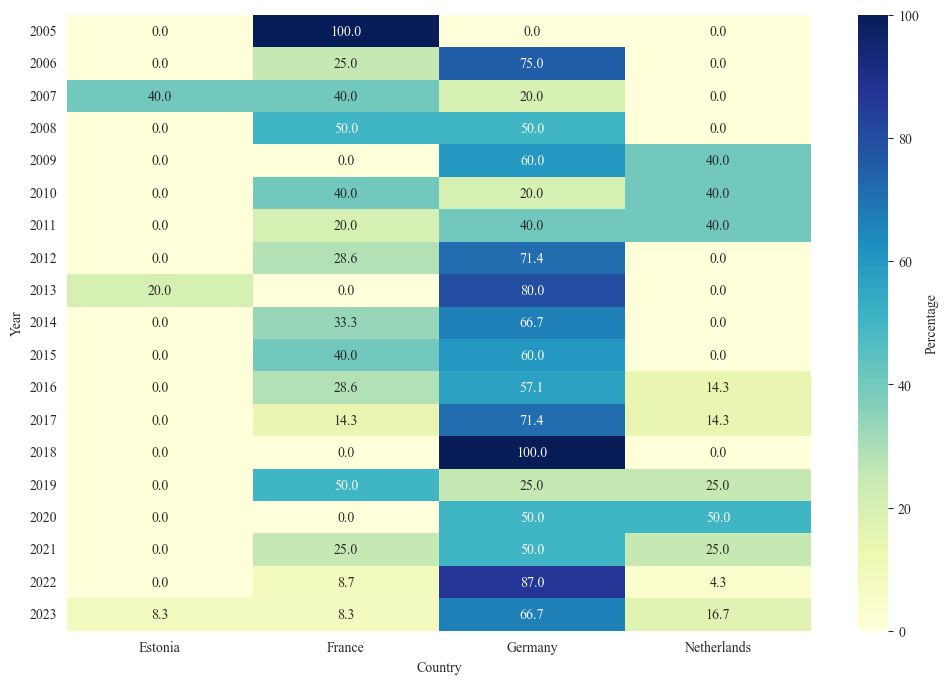

FileNotFoundError: [Errno 2] No such file or directory: 'images/heatmap.png'

<Figure size 640x480 with 0 Axes>

In [ ]:
# Assuming pivot_df_percentage is the DataFrame with the percentage of disruption
pivot_df_percentage.index = pivot_df_percentage.index.astype(int)  # Convert years to integers

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_df_percentage, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage'})
plt.xlabel('Country')
plt.ylabel('Year')

# Rotate y-axis labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()

# Save the plot
plt.savefig('.../images/heatmap.png', dpi=300, bbox_inches='tight')